In [1]:
import numpy as np
import pandas as pd
import MLP
import function

In [2]:
reg = pd.read_csv('Regression_data.csv', index_col=0)

In [3]:
reg.head()

,0,1,2,3,4,5,6,7,8,9,0.1
0,0.736973,1.971215,0.486563,0.246946,1.461828,-0.108591,1.380698,1.319824,1.136359,-0.772229,532.214453
1,-1.758418,-0.152274,0.693135,0.622151,-1.018113,0.635016,1.415783,-0.612715,-2.722381,-0.215689,-156.992795
2,0.373332,1.631411,-0.367491,-0.462480,-1.703389,0.619288,1.329516,-0.617957,-0.048312,1.589031,97.320690
3,0.718974,0.412092,0.020083,-0.995617,1.673778,-0.043589,0.605091,1.470185,1.275230,-0.712714,284.097287
4,1.024358,-2.044509,0.686058,0.926548,-0.796787,-0.596945,-0.739005,-1.255296,-0.170030,-0.088205,-236.445701


In [4]:
X_train, X_test, y_train, y_test = reg.iloc[:800,:-1].values, reg.iloc[800:,:-1].values, reg.iloc[:800,-1].values, reg.iloc[800:,-1].values


In [5]:
network = MLP.MultilayerPerceptron(input_n=10, output_n=1, mode=0)

iters_num = 1000
train_size = X_train.shape[0]
batch_size = 50
learning_rate = 0.001

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [6]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = network.gradient(X_batch, y_batch)
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
#     print (network.params['W1'])
    
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.loss(X_train, y_train)
        test_acc = network.loss(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

18876786.168559637 4608895.101054812
18876110.35680063 4609415.807229191
18874497.2708342 4610687.363293548
18871762.442302305 4612927.170277014
18870171.073193006 4614271.645791623
18870074.563824117 4614328.921136239
18869560.96669896 4614718.718202358
18867409.946791902 4616458.635599753
18866799.112190988 4616402.619611481
18862008.13592312 4616788.7651838865
18656055.030305825 4582518.946548004
4931915.219359666 1644165.4011597054
651874.7929526962 174607.645624569
2325452.1249873633 424259.6851602951
9933295.177457491 1696001.0676288377
508933.84898072993 157590.16778527468
5445354.87474807 907774.1280351904
275741.7244420294 61233.50683227109
1093428.489104482 260275.68685087637
558691.4371203608 167552.90488222457
1517374.8539088115 279698.3359612429
346590.12557553547 59884.2773187115
9185757.358294848 1460391.6257381837
914653.6480593504 270091.76602266775
6122444.281135589 1026960.060473085
14581130.386673838 2275562.075832772
10676779.787678014 1789922.9683779331
10127777.9

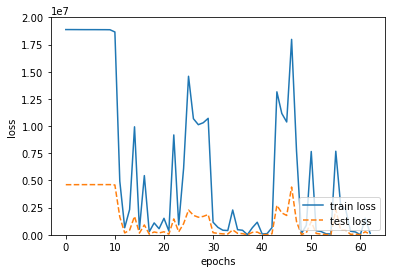

In [8]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train loss')
plt.plot(x, test_acc_list, label='test loss', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 20000000)
plt.legend(loc='lower right')
plt.show()